## IMAGE SELECTION

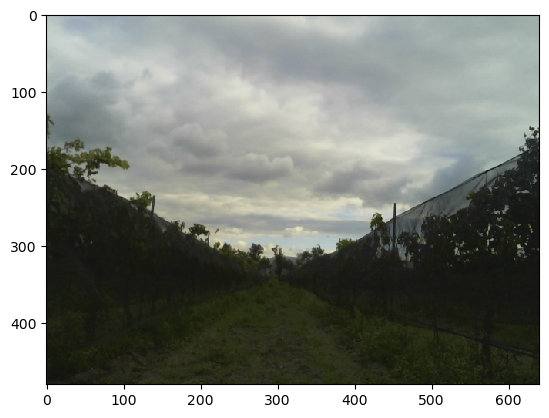

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread("test_images/20221002-223338.jpg")
#cv2.imshow("original",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(rgb_img)
plt.show()

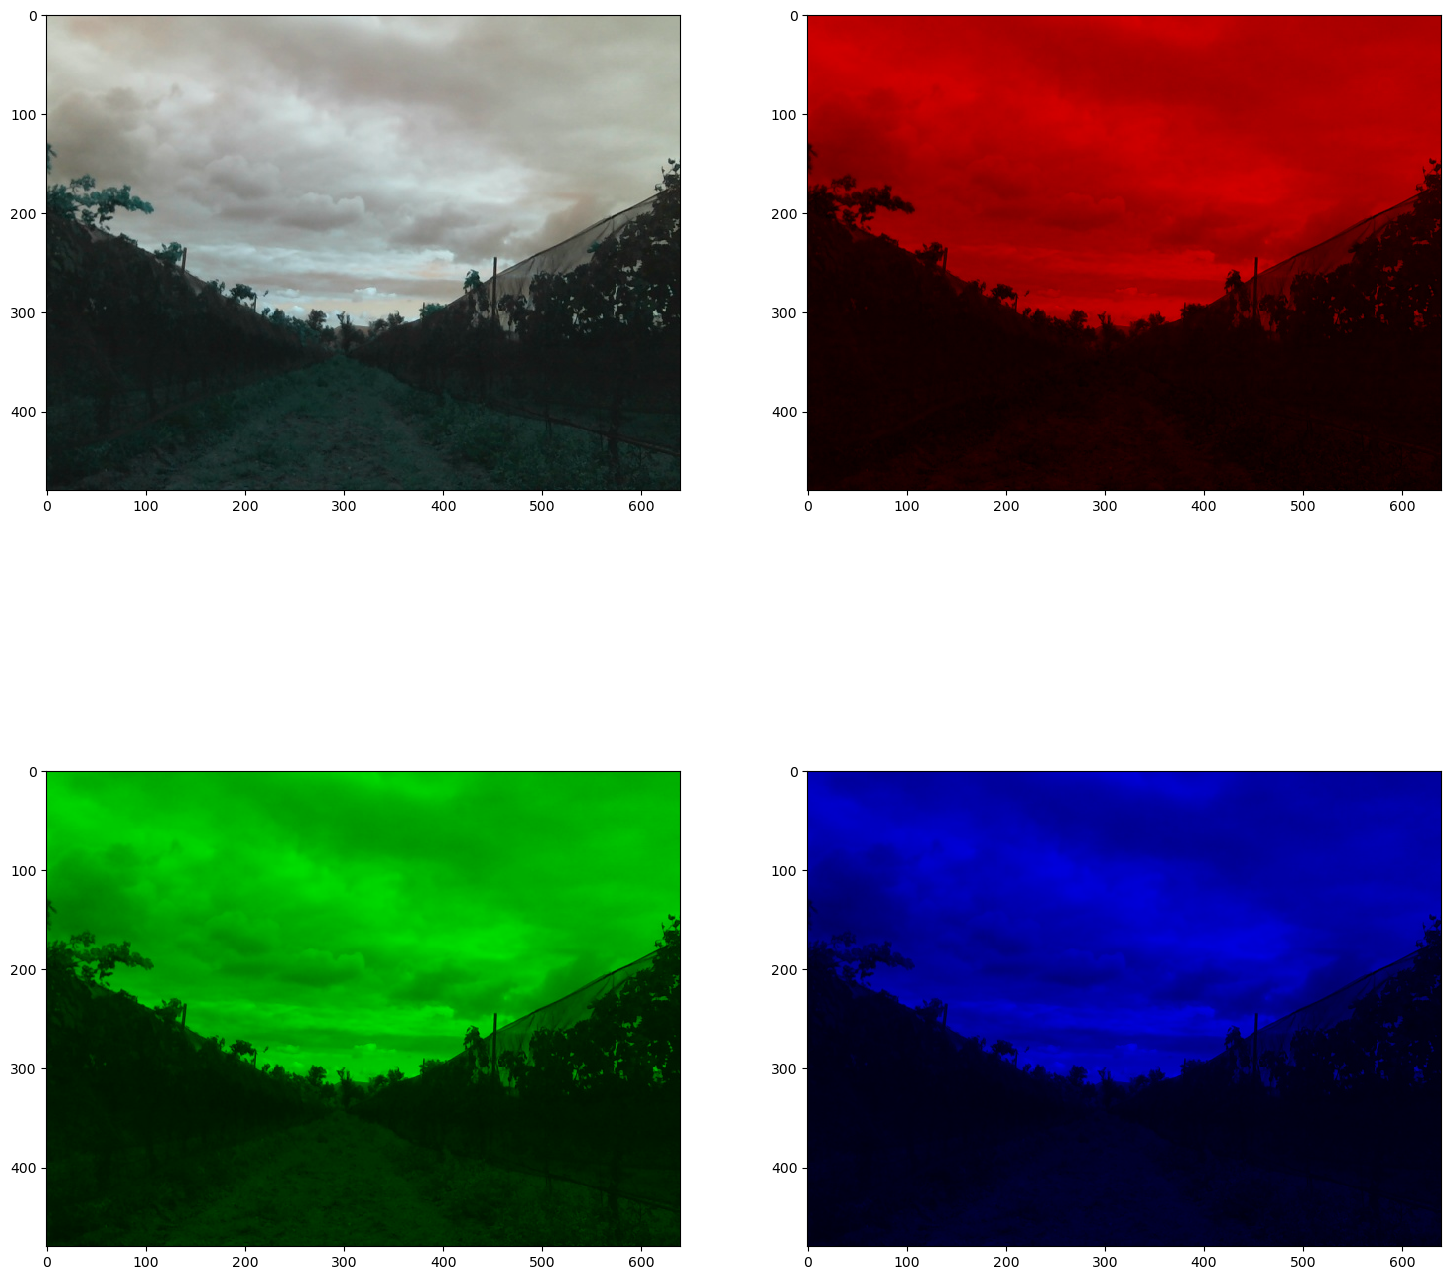

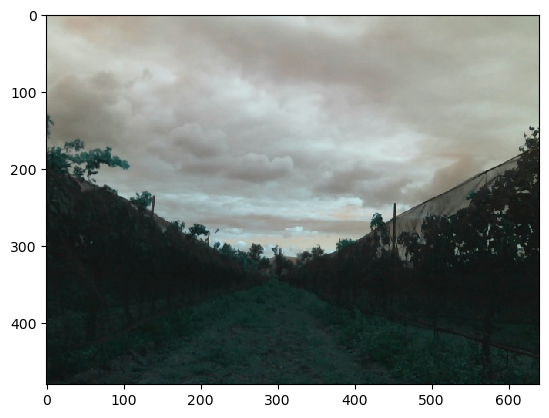

In [2]:
from email.mime import image


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R = img.copy() 
G = img.copy()
B = img.copy()

R[:,:,1] = R[:,:,2] = 0
G[:,:,0] = G[:,:,2] = 0
B[:,:,0] = B[:,:,1] = 0


fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

bx.imshow (R)
cx.imshow (G)
dx.imshow (B)
ax.imshow (img)

plt.figure()
image_added = cv2.add(R,G)
image_added = cv2.add(image_added,B)

plt.imshow(image_added)

## EXG INDEX

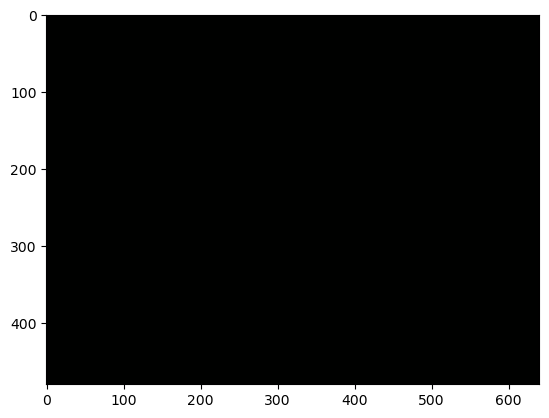

In [3]:
#2 * (Green / (Red + Green + Blue)) – (Red / (Red + Green + Blue)) – (Blue / (Red + Green + Blue))
green_division = cv2.divide(G,img_rgb)
red_division = cv2.divide(R,img)
blue_division = cv2.divide(B,img)
exg_img = 2 * cv2.subtract(cv2.subtract(green_division,red_division),red_division)

plt.imshow(green_division)


## COLOR FILTER

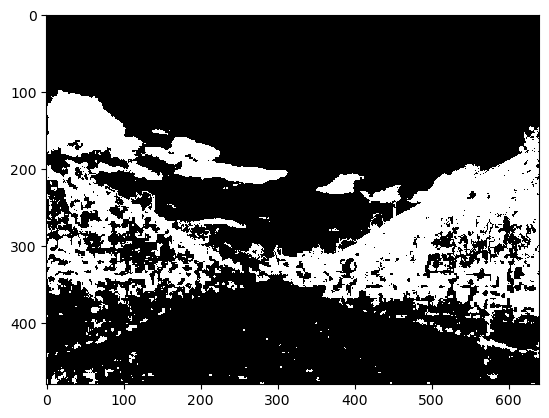

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
min_color = np.array([0,0,0])
max_color = np.array([180,63,152])

colorMask = cv2.inRange(hsv, min_color, max_color)

rgb_img = cv2.cvtColor(colorMask, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(rgb_img)
plt.show()

## OTSU METHOD

## MORPHOLOGICAL OPERATIONS

In [1]:
#Erosion
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
imagen_erosion = cv2.morphologyEx(colorMask,cv2.MORPH_ERODE,kernel)

result = cv2.bitwise_and(img,img, mask= colorMask) #En el nodo esta línea no hace nada

rgb_img = cv2.cvtColor(imagen_erosion, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(rgb_img)
plt.show()

NameError: name 'np' is not defined

## EDGE DETECTION

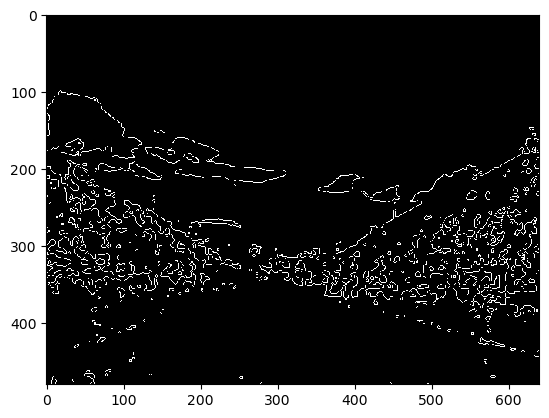

In [6]:
edges = cv2.Canny(imagen_erosion,50,150,apertureSize = 3)

rgb_img = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(rgb_img)
plt.show()

## LINE DETECTION

NO LINES DETECTED


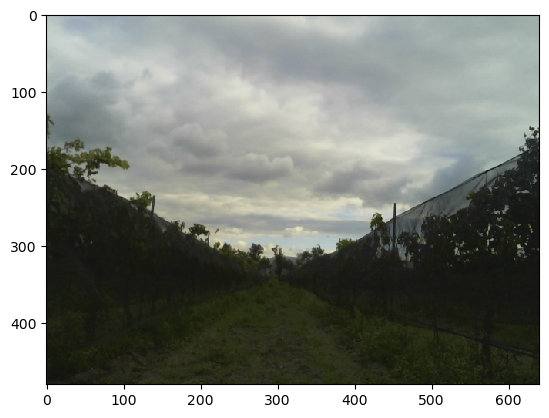

In [7]:
lines = cv2.HoughLines(edges,1,np.pi/180,200) 
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img, pt1, pt2, (0,255,255), 3)
        print('line',i)
else:
    print("NO LINES DETECTED")
#cv2.imshow('houghlines',img)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convertion to rgb in order to maintain the same colors in cv2 and pyplot
plt.imshow(rgb_img)
plt.show()